# Homework 1
Get used to basic usage of numpy and matplotlib. 

Tip: If you are unfamiliar with how to use certain functions, look up the documentation online. Knowing this skill will be very useful, in general.

# 1 Basic numpy
## 1.1 Load data with numpy
- [1 pt] load "matrix.csv" as a numpy array. The imported array should be 20 rows by 3 columns. (Hint: You can use np.loadtxt(), make sure to specify correct delimiter argument.)

In [1]:
import numpy as np
matrix = np.loadtxt("matrix.csv", delimiter = ",")

## 1.2 Row sum
(a) [1 pt] make array where each entry represents the row sum of matrix. (hint: use np.sum() function, make sure to use the correct axis)

In [2]:
rowsum = np.sum(matrix, axis = 1)
rowsum

array([ 0.4844172 , -2.50909969,  1.30264396, -0.84740315,  0.42729788,
       -2.15017789, -0.47559022,  2.54880877,  0.09423786, -0.67330205,
       -1.77558698, -1.52911637,  0.77690753, -0.33742036,  0.99610406,
        1.65417497,  1.03753238, -1.84411077,  1.21671237,  2.10183057])

(b) [1 pt] make array, $\texttt{idx}$, containing indices of rowsum that have values greater than 1. Then, print $\texttt{idx}$. (hint: use np.where() function)

In [3]:
idx = np.where(rowsum > 1)
idx

(array([ 2,  7, 15, 16, 18, 19]),)

## 1.3 Plot histogram of lengths
Now, view each row of the 20 by 3 array as a vector in $\mathbb{R}^3$.

(a) [1 pt] find the (Euclidean) length of vector (i.e., each row).

In [4]:
Euclidean = np.linalg.norm(matrix, axis = 1)
Euclidean

array([1.8143068 , 2.68277327, 1.93017874, 2.53852811, 1.23971116,
       1.41778972, 1.24612124, 1.54134966, 1.13759713, 1.10846984,
       1.05262257, 1.07939999, 2.01451642, 1.1727385 , 1.85073756,
       2.20301698, 0.696764  , 1.24557943, 1.04482378, 1.31604942])

Definition: A _density histogram_ is a histogram that is normalized so that the total area under the bars sums to unity. 

(b) [2 pt] plot a density histogram of the length of vectors. Make your bins between 0.5 to 3.0, with increments of 0.5. (So, you should have 5 bins)

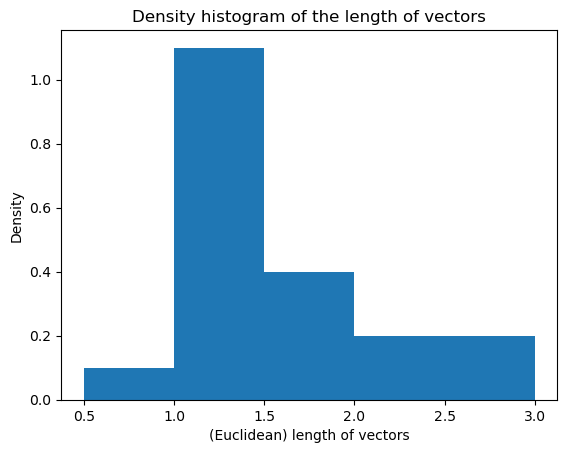

In [15]:
import matplotlib.pyplot as plt
plt.hist(Euclidean, bins = 5, range = (0.5, 3), density = True)
plt.xlabel('(Euclidean) length of vectors')
plt.ylabel('Density')
plt.title('Density histogram of the length of vectors')
plt.show()

# 2 Sampling
## 2.1 Load data with pandas
[1 pt] **Using pandas**, load "stocks.csv" on monthly stock returns from 1926 to 2021 ([source](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)) and define array $\texttt{ret}$ as the values of the "Mkt-RF" column in the dataset (you should get an array of length 1165). (Hint: use the  pd.read_csv() function and .values method.)

In [6]:
import pandas as pd
stocks = pd.read_csv("stocks.csv")
ret = stocks["Mkt-RF"].values

## 2.2 Plot histogram
(a) [2 pts] Plot a density histogram of the returns $\texttt{ret}$ with 100 equispaced bins from -30 to +40.

(b) [2 pts] Over this histogram, plot the PDF of a normal distribution with mean equal to the sample mean of the returns and standard deviation equal to the sample standard deviation of the returns.

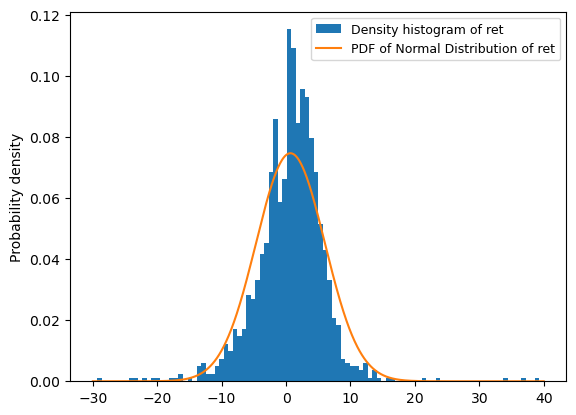

In [14]:
plt.hist(ret, bins = 100, range = (-30, 40), density = True, label = 'Density histogram of ret')
from scipy.stats import norm as gaussian
x = np.linspace(-30, 40, 1000)
y = gaussian(np.mean(ret), np.std(ret))
plt.plot(x, y.pdf(x),label = 'PDF of Normal Distribution of ret')
plt.legend(loc = 0, prop={'size': 9})
plt.ylabel('Probability density')
plt.show()

## 2.3 Analysis of ret data
(a) [1 pt] What is the skew and kurtosis of $\texttt{ret}$? Print them. (You may use scipy functions)


In [8]:
from scipy.stats import skew, kurtosis
print(skew(ret))
print(kurtosis(ret))

0.1560814766802238
7.413300610425784


(b i) [1 pt] Generate $\texttt{len(ret)}$ samples from the univariate normal distribution with 
- mean = sample mean of $\texttt{len(ret)}$
- standard deviation = sample standard deviation of $\texttt{len(ret)}$

(b ii) [1 pt] What is the skew and kurtosis of these samples? Print them.

In [12]:
n = len(ret)
samples = gaussian.rvs(np.mean(ret), np.std(ret), size=len(ret))
print(skew(samples))
print(kurtosis(samples))

0.06273687304225985
0.06480419201239362


(c) [1 pt] Explain in what ways the stock returns do not resemble a normal distribution. Your response should compare skew and kurtosis you computed and the plots you generated above.

**Ans:** (The calculated skewness of the distribution is approximately 0.156, which is not 0. In this case, the plot is a right-skewed normal distribution with an uneven distribution of area among both sideds of mean: right side < left side. The calculated kurtosis value is approximately 7.4133, which is significantly larger than 3, meaning that the plot has a thinner and higher peak and larger tails. Besides, the plotted density histogram and PDF of a normal distribution matching the mean and standard deviation of ret show some discrepancies. There are many spikes that penetrate through the normal curve; also, the tails of the histograms are visually thinner than the normal distribution, indicating that stock returns do not resemble a normal distribution.) 